#        HANDWRITTEN DIGIT RECOGNITION 

#                                USING               "ANN"

# LIBRARIES 


We are going to do this task using the "KERAS" Library.

The data given containes a "20x20" pixcal of the digits from 0 to 9.
There are 500 data types for each digit.

We are also going to use the DataSet from Matlab using the module "loadmat".



In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import matplotlib.image as mpimg

In [127]:
# Use loadmat to load matlab files
mat=loadmat("D:/User/Desktop/ex3data1.mat")
x=mat["X"]
y=mat["y"]

In [129]:
# Length of the DataSet 

print(x.shape,y.shape)


(5000, 400) (5000, 1)


In [131]:
y_train1.shape

(4000, 1)

# EXAMINING THE DATA


In [4]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

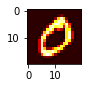

In [5]:
# VISUALIZATION OF THE X_DATA


d1=x[0].reshape((20,20),order='F')
fig = plt.figure(figsize=(1,1))
plt.imshow(d1,cmap='hot')

In [6]:
#Value of y for the same x value is:

y[10]

array([10], dtype=uint8)

In [7]:
# There is a mistake in the data set that is 0 is represented s 10 in the y data set
# So let's replace 10 with 0 in the data set.

y=pd.DataFrame(y).replace(to_replace=[10],value=[0])
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
4995,9
4996,9
4997,9
4998,9


THE DATA LOOKS CORRECT .

# NOTE:

NOW BEFORE PUTTING THE DATA VALUES INTO THE CLASSIFIER WE WILL HAVE TO DIVIDE THE CLASS IN THE Y DATA IN THE BINARY DATA .BECAUSE THIS IS THE FORMAT REQUIRED FOR THE KERAS CLASSIFIER .
 

In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

y=ohe.fit_transform(y).toarray()

C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [9]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
# Just to see the y_data which makes more sense

pd.DataFrame(y)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# SPLITING THE DATA

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
# IMPORTING THE LIBRARIES 

from keras.models import  Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np

Using TensorFlow backend.


# ARTITECTURE OF THE NUERAL_NET


WE HAVE THE "400" NEURON'S IN THE INPUT LAYER ,2 HIDDEN_LAYERS WITH (500,400) NUERONNS AND THE OUTPUT

LAYER WITH 10 NUERONS SINCE THERE ARE 10 CLASSES TO BE CLASSIFIED.



In [114]:
# MAKING THE CLASSIFIER

classifier=Sequential()

classifier.add(Dense(output_dim=500,init='uniform',activation='relu',input_dim=400))
classifier.add(Dense(output_dim=400,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=10,init='uniform',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=400, units=500, kernel_initializer="uniform")`
  """
C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=400, kernel_initializer="uniform")`
  
C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10, kernel_initializer="uniform")`
  import sys


# TRANING DATASET

In [115]:
classifier.fit(x_train,y_train,nb_epoch=100,batch_size=100)

C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
4000/4000 [==============================] - 2s 565us/step - loss: 1.1302 - accuracy: 0.7190
Epoch 2/100
4000/4000 [==============================] - 1s 204us/step - loss: 0.3994 - accuracy: 0.8780
Epoch 3/100
4000/4000 [==============================] - 1s 138us/step - loss: 0.2554 - accuracy: 0.9295
Epoch 4/100
4000/4000 [==============================] - 1s 164us/step - loss: 0.1890 - accuracy: 0.9475
Epoch 5/100
4000/4000 [==============================] - 1s 247us/step - loss: 0.1487 - accuracy: 0.9625
Epoch 6/100
4000/4000 [==============================] - 1s 185us/step - loss: 0.1189 - accuracy: 0.96750s - loss: 0.1114 - accura
Epoch 7/100
4000/4000 [==============================] - 1s 166us/step - loss: 0.0943 - accuracy: 0.9755
Epoch 8/100
4000/4000 [==============================] - 1s 189us/step - loss: 0.0723 - accuracy: 0.9852
Epoch 9/100
4000/4000 [==============================] - 1s 175us/step - loss: 0.0595 - accuracy: 0.9862
Epoch 10/100
4000/4000 [=====

WE ARE GETTIGETTING 100% ACCURACY ON THE TRAIN DATA.

# TEST DATA ACCURACY

In [116]:
y_pred=classifier.predict(x_test)

In [117]:
# HERE WE ARE CONVERTING THE BINARY INTO THE CLASS- THAT IS THE REVERCE OF WHAT WE DID USING OneHotEncoder

pred=[]
test=[]

for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
    
    

In [118]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 93.7


# PREDICATION ACCURACY IS : 93.7

In [119]:
classifier.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 500)               200500    
_________________________________________________________________
dense_61 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_62 (Dense)             (None, 10)                4010      
Total params: 404,910
Trainable params: 404,910
Non-trainable params: 0
_________________________________________________________________
